
 Without intervention:
Total QALYs: 14.53 
Total DALYs: 2.89 
Total PALYs: 11.4 

 With intervention:
Total QALYs: 14.79 
Total DALYs: 2.63 
Total PALYs: 11.6 
  Metric No_Intervention Intervention Difference
1   QALY       14.526286    14.788070  0.2617845
2   DALY        2.886862     2.625077 -0.2617845
3   PALY       11.396364    11.604309  0.2079447


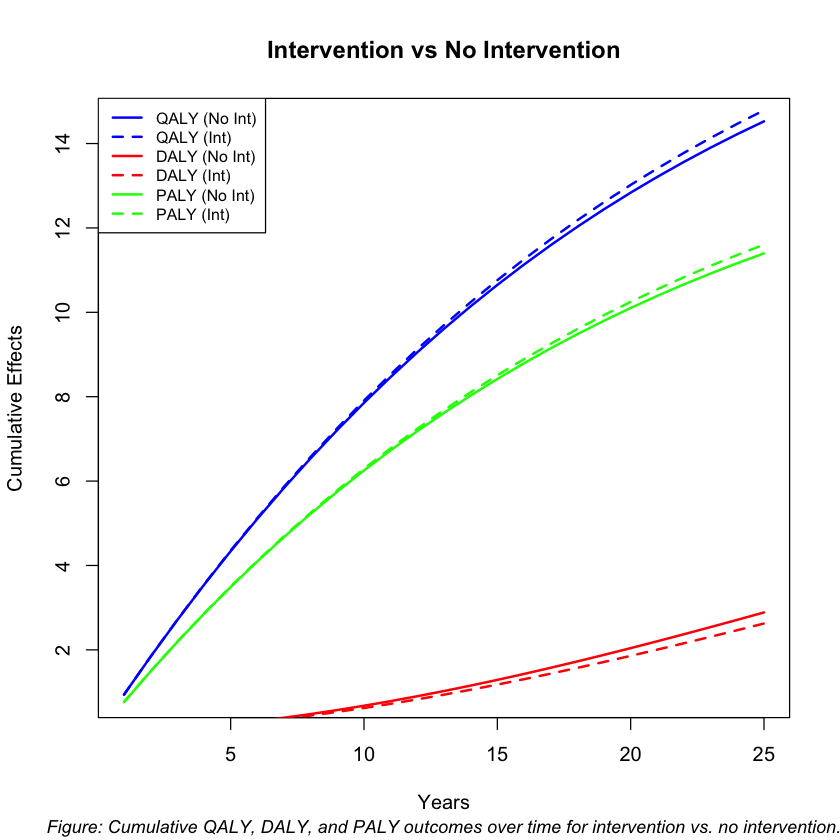

In [1]:
# Parameters
n_cycles <- 25  # Simulated years
n_states <- 7   # States: Healthy_Working, Healthy_Unemployed, PostCVD_Working, PostCVD_Unemployed, RecCVD_Working, RecCVD_Unemployed, Death
discount_rate <- 0.03  # Discount rate (3%)

# Intervention effect (user can adjust)
intervention_effect <- 0.20  # Example: 20% reduction in CVD risk

# Initial state distribution: All start as healthy (100%) and working (75%). Need to be adjusted based on country-specific statistics. 
state_vector <- c(0.75, 0.25, 0, 0, 0, 0, 0)

# Transition probabilities WITHOUT intervention
transition_matrix_no_int <- matrix(c(
  # From:    Healthy_W    Healthy_U    PostCVD_W   PostCVD_U   RecCVD_W    RecCVD_U   Death
  0.93,      0.05,        0.015,       0.005,      0.000,      0.000,      0.000,  # Healthy_W
  0.10,      0.85,        0.02,        0.03,       0.000,      0.000,      0.000,  # Healthy_U
  0.00,      0.00,        0.85,        0.10,       0.03,       0.02,       0.00,   # PostCVD_W
  0.00,      0.00,        0.05,        0.80,       0.05,       0.08,       0.02,   # PostCVD_U
  0.00,      0.00,        0.00,        0.00,       0.70,       0.25,       0.05,   # RecCVD_W
  0.00,      0.00,        0.00,        0.00,       0.10,       0.75,       0.15,   # RecCVD_U
  0.00,      0.00,        0.00,        0.00,       0.00,       0.00,       1.00    # Death
), nrow = n_states, byrow = TRUE)

# Update transition probabilities WITH intervention
transition_matrix_int <- transition_matrix_no_int

# Reduce CVD risk due to intervention
transition_matrix_int[1,3] <- transition_matrix_no_int[1,3] * (1 - intervention_effect)  # Healthy_W → PostCVD_W
transition_matrix_int[2,4] <- transition_matrix_no_int[2,4] * (1 - intervention_effect)  # Healthy_U → PostCVD_U

# Normalize rows (ensuring transition probabilities sum to 1)
transition_matrix_int <- transition_matrix_int / rowSums(transition_matrix_int)

# QALY, DALY, PALY
qalys <- c(1.0, 0.9, 0.75, 0.6, 0.50, 0.3, 0.0)       # Quality-adjusted life years
dalys <- c(0, 0.1, 0.25, 0.4, 0.50, 0.7, 1.0)        # Disability-adjusted life years
palys <- c(1.0, 0.2, 0.80, 0.1, 0.60, 0.05, 0.0)      # Productivity-adjusted life years

# Simulation WITHOUT intervention
qaly_results_no_int <- rep(0, n_cycles)
daly_results_no_int <- rep(0, n_cycles)
paly_results_no_int <- rep(0, n_cycles)
state_vector_no_int <- state_vector

for (t in 1:n_cycles) {
  state_vector_no_int <- state_vector_no_int %*% transition_matrix_no_int
  qaly_results_no_int[t] <- sum(state_vector_no_int * qalys) / (1 + discount_rate)^t
  daly_results_no_int[t] <- sum(state_vector_no_int * dalys) / (1 + discount_rate)^t
  paly_results_no_int[t] <- sum(state_vector_no_int * palys) / (1 + discount_rate)^t
}

# Simulation WITH intervention
qaly_results_int <- rep(0, n_cycles)
daly_results_int <- rep(0, n_cycles)
paly_results_int <- rep(0, n_cycles)
state_vector_int <- state_vector

for (t in 1:n_cycles) {
  state_vector_int <- state_vector_int %*% transition_matrix_int
  qaly_results_int[t] <- sum(state_vector_int * qalys) / (1 + discount_rate)^t
  daly_results_int[t] <- sum(state_vector_int * dalys) / (1 + discount_rate)^t
  paly_results_int[t] <- sum(state_vector_int * palys) / (1 + discount_rate)^t
}

# Total results
total_qaly_no_int <- sum(qaly_results_no_int)
total_daly_no_int <- sum(daly_results_no_int)
total_paly_no_int <- sum(paly_results_no_int)

total_qaly_int <- sum(qaly_results_int)
total_daly_int <- sum(daly_results_int)
total_paly_int <- sum(paly_results_int)

# Print results
cat("\n Without intervention:\n")
cat("Total QALYs:", round(total_qaly_no_int, 2), "\n")
cat("Total DALYs:", round(total_daly_no_int, 2), "\n")
cat("Total PALYs:", round(total_paly_no_int, 2), "\n")

cat("\n With intervention:\n")
cat("Total QALYs:", round(total_qaly_int, 2), "\n")
cat("Total DALYs:", round(total_daly_int, 2), "\n")
cat("Total PALYs:", round(total_paly_int, 2), "\n")

# Plot: Comparison of cumulative effects
plot(1:n_cycles, cumsum(qaly_results_no_int), type = "l", col = "blue", lwd = 2, 
     ylab = "Cumulative Effects", xlab = "Years", main = "Intervention vs No Intervention")
lines(1:n_cycles, cumsum(qaly_results_int), col = "blue", lwd = 2, lty = 2)

lines(1:n_cycles, cumsum(daly_results_no_int), col = "red", lwd = 2)
lines(1:n_cycles, cumsum(daly_results_int), col = "red", lwd = 2, lty = 2)

lines(1:n_cycles, cumsum(paly_results_no_int), col = "green", lwd = 2)
lines(1:n_cycles, cumsum(paly_results_int), col = "green", lwd = 2, lty = 2)

# Smaller font size for the legend & move to top-left
legend("topleft", legend = c("QALY (No Int)", "QALY (Int)", "DALY (No Int)", "DALY (Int)", "PALY (No Int)", "PALY (Int)"),
       col = c("blue", "blue", "red", "red", "green", "green"), lwd = 2, lty = c(1,2,1,2,1,2), 
       bty = "o", bg = "white", cex = 0.8)  # "cex = 0.8" reduces font size

# Independent caption below the plot
mtext("Figure: Cumulative QALY, DALY, and PALY outcomes over time for intervention vs. no intervention.", 
      side = 1, line = 4, cex = 0.9, font = 3)  # Italicized caption

# Create a summary table
summary_table <- data.frame(
  Metric = c("QALY", "DALY", "PALY"),
  No_Intervention = c(sum(qaly_results_no_int), sum(daly_results_no_int), sum(paly_results_no_int)),
  Intervention = c(sum(qaly_results_int), sum(daly_results_int), sum(paly_results_int)),
  Difference = c(sum(qaly_results_int) - sum(qaly_results_no_int),
                 sum(daly_results_int) - sum(daly_results_no_int),
                 sum(paly_results_int) - sum(paly_results_no_int))
)

# Print the summary table
print(summary_table)